# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 12: Orbital variations, insolation, and the ice ages

## Contents

1. [First section title](#section1)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const

____________
<a id='section1'></a>

## 1. The ice ages
____________

Recent Earth history (past few million years) has been dominated by the repeated growth and retreat of large continental ice sheets, mostly over the land masses of the Northern Hemisphere.

### Extent of glaciation

The images below show typical maximum extents of the ice sheets during recent glaciations (grey) compared with present-day ice sheets (black)

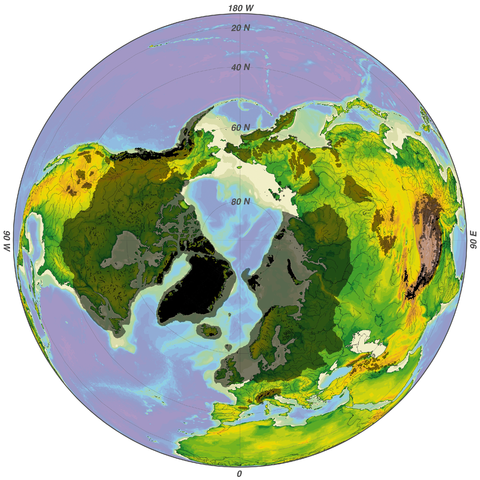

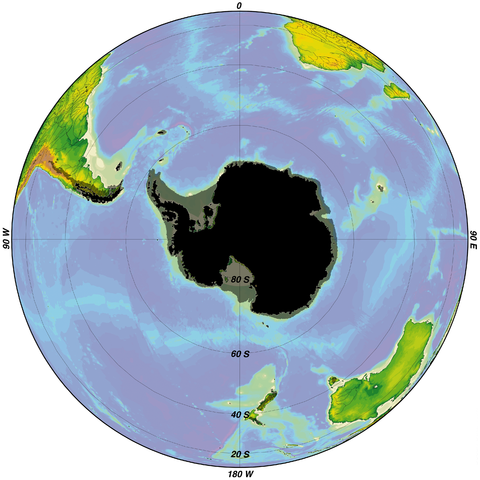

In [27]:
from IPython.display import display, Image
url = []
url.append('http://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Iceage_north-intergl_glac_hg.png/480px-Iceage_north-intergl_glac_hg.png')
url.append('http://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Iceage_south-intergl_glac_hg.png/480px-Iceage_south-intergl_glac_hg.png')

for u in url:
    display(Image(u))

> Hannes Grobe/AWI, http://commons.wikimedia.org/wiki/File:Iceage_north-intergl_glac_hg.png

### Pacing of ice ages: evidence from ocean sediments

This figure shows a global record of oxygen isotopes recorded in the shells of marine organisms. This record tells us primarily about variations in **global ice volume** -- because the net evaporation of water from the oceans to build up the ice sheets leaves the oceans enriched in heavier isotopes.

The x axis is plotted in **Thousands of years before present** (present-day is at zero on the left).

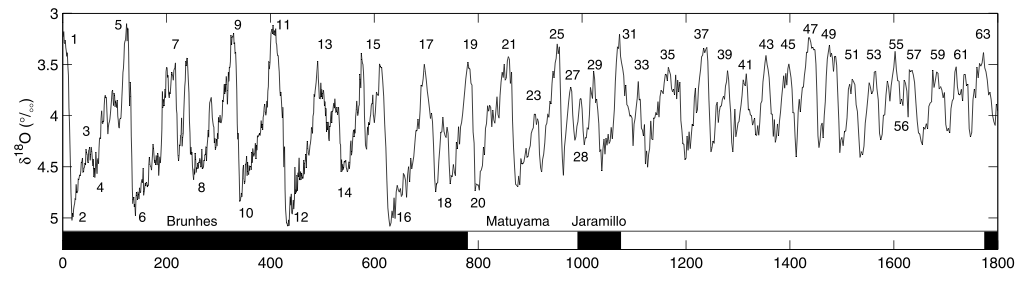

In [28]:
Image('../images/Lisiecki_Raymo_Fig.4top.png')

> Lisiecki, L. E. and Raymo, M. E. (2005). A Pliocene-Pleistocene stack of 57 globally distributed benthic δ18O records. Paleoceanog., 20.

The ice ages (times of extensive glaciation and high ocean $\delta^{18}$O) do not seem to be random fluctations. They have come and gone with (approximately) periodically, somewhat like the seasons.

____________
<a id='section2'></a>

## 2. Introducing the astronomical theory of the ice ages
____________

The **Astronomical Theory** of climate and the ice ages looks to the **regular, predictable variations in the Earth's orbit around the Sun** as the driving force for the growth and melt of the great ice sheets.

Last time we saw that insolation is NOT perfectly symmetrically distributed between the two hemispheres and seasons. 

To refresh our memory, let's use `climlab.solar.insolation.daily_insolation()` to comparte the maximum insolation received at the North Pole (at its summer solstice) and the South Pole (at its summer solstice).

In [6]:
from climlab.solar.insolation import daily_insolation
days = np.linspace(0, const.days_per_year, 365. )
Qnorth = daily_insolation(90,days)
Qsouth = daily_insolation(-90,days)
print 'Daily average insolation at summer solstice:'
print 'North Pole: %0.2f W/m2.' %np.max(Qnorth)
print 'South Pole: %0.2f W/m2.' %np.max(Qsouth)

Daily insolation at summer solstice:
North Pole: 525.31 W/m2.
South Pole: 562.03 W/m2.


These asymmetries arise because of the detailed shape of the orbit of the Earth around the Sun and the tilt of the Earth's axis of rotation.

As these orbitals details change over time, there are significant changes in the distribution of sunlight over the seasons and latitudes.

### The Milankovitch hypothesis

Version of the astronomical theory have been debated for at least 150 years.

The most popular flavor has been the so-called **Milankovitch hypothesis**:

> Ice sheets grow during periods of *weak summer insolation* in the Northern high latitudes.

The idea is that for an ice sheet to grow, seasonal snow must survive through the summer. Milankovitch therefore focussed on the factors determining the climatic conditions during **summer**.

____________
<a id='section3'></a>

## 3. Ellipses and orbits
____________

First, watch this neat animation from [Peter Huybers](http://www.people.fas.harvard.edu/~phuybers) (Harvard University):

http://www.people.fas.harvard.edu/~phuybers/Inso/Orbit.avi

Watch carefully and note the three ways that the orbit is varying simultaneously.

From Professor Huybers' web page:
>A movie depicting Earth's changing orbit over the last 100Ky. The orientation is such that spring equinox (indicated by a vertical bar) is directly to the front with the sun behind it. Northern Hemisphere summer is to our right, and Northern Hemisphere winter is to the left. The apsidal (dashed) line connects perihelion (Earth's closest approach to the sun) to aphelion (the point when Earth is furthest from the sun). The rotaion of the apsidal line occurs because of the precession of the equinoxes and has a roughly twenty-two thousand year period. The semi-circle around the Earth indicates the location of the equator and the straight line is the polar axis. Obliquity is defined as the angle beetween the orbital and equatorial planes. The variations in Earth's obliquity and the eccentricity of Earth's orbit have both been increased in magnitude by a factor of ten. Also, the Earth's angular velocity has been decreased by a factor of five thousand. Note that Earth's angular velocity is slowest at aphelion and fastest at perihelion. 



The Earths 

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [1]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, climlab

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.0.0
OS Darwin 13.4.0 x86_64 i386 64bit
numpy 1.8.1
climlab 0.2.4
Wed Mar 25 10:39:56 2015 EDT